Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Cabos, Jhillian
**Section** | CPE32S3
**Date Performed**: | Feb 20 2025
**Date Submitted**: |
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to allow students to perform face detection on still images and videos using Haar cascades.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize OpenCV to detect faces in still images and videos.
* Demonstrate the use of Haar-like features for detection of other human features.

## 3. Procedures and Outputs

Contrary to initial assumptions, conducting face detection on a static image and a video stream shares a remarkable similarity. Essentially, the latter is merely a sequential rendition of the former: when detecting faces in videos, it essentially involves applying face detection to every individual frame obtained from the camera feed. Of course, video face detection introduces additional elements like tracking, which aren't relevant to static images. Nevertheless, it's valuable to recognize that the fundamental principles behind both processes remain consistent.

### Performing face detection on still image

The first and most basic way to perform face detection is to load an image and detect faces in it. To make the result visually meaningful, we will draw rectangles around faces on the original image.

**Before implementing the code below**, check the contents of the `cv2.CascadeClassifier()` function. Provide an explanation of the function, its parameters before running the code below.

In [ ]:
# Make sure that for this activity, you have downloaded the
# file indicated below from the resource linked in the instructional materials
# in the module.

import cv2
from google.colab.patches import cv2_imshow

picPath = '/content/bb.jpg'
haarPath = '/content/haarcascade_frontalface_default.xml'

def faceDetect(picPath):
  face_cascade = cv2.CascadeClassifier(haarPath)

  img = cv2.imread(picPath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

  cv2_imshow(img)

In [ ]:
faceDetect(picPath)

**Analysis**:
- Based on your earlier analysis, where do you think the face detection works in the line of code above?

= The `detectMultiScale` function scans an image for faces using a trained model and returns a list of rectangles representing detected faces. Each rectangle includes the top-left corner's coordinates (`x, y`) and the face's width (`w`) and height (`h`).
- Provide an analysis of the parameters of the `detectMultiScale` method.

= The `detectMultiScale` function has several key parameters: `image` is the grayscale input for detection, `scaleFactor` (default 1.1) controls how much the image shrinks at each step, balancing speed and accuracy. `minNeighbors` (default 5) sets the required number of overlapping detections to confirm a face, reducing false positives. `minSize` (30,30) sets the smallest detectable face, while `maxSize` (optional) limits the largest face detected.

- Change the color of the border of the detected faces to red.
=
- Are you able to make the borders thicker? Demonstrate.

In [ ]:
def faceDetect(picPath):
  face_cascade = cv2.CascadeClassifier(haarPath)
  img = cv2.imread(picPath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 10)
  cv2_imshow(img)

In [ ]:
faceDetect(picPath)

### Performing face detection on video

**Step 1**: Create a file called face_detection.py and include the following codes.

In [3]:
import cv2

**Step 2:** After this, we declare a method, `detect()`, which will perform face detection.

In [4]:
def detect():
  face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)
  cv2.CascadeClassifier('/content/haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)

**Step 3:** The first thing we need to do inside the detect() method is to load the Haar cascade files so that OpenCV can operate face detection. As we copied
the cascade files in the local `cascades/` folder, we can use a relative path. Then, we open a VideoCapture object (the camera feed). The VideoCapture  constructor takes a parameter, which indicates the camera to be used; zero indicates the first camera available.

In [5]:
import cv2

def detect():
  face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)  # Initialize camera here

  # Removed redundant line: cv2.CascadeClassifier('/content/haarcascade_eye.xml')
  # Removed redundant line: camera = cv2.VideoCapture(0)

  while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

**Step 4:** Next up, we capture a frame. The read() method returns two values: a Boolean indicating the success of the frame read operation, and the frame
itself. We capture the frame, and then we convert it to grayscale. This is a necessary operation, because face detection in OpenCV happens in the grayscale color space:

**Step 5:** Much like the single still image example, we call detectMultiScale on the grayscale version of the frame.

**Step 6:** Here we have a further step compared to the still image example: we create a region of interest corresponding to the face rectangle, and within this rectangle, we operate "eye detection". This makes sense as you wouldn't want to go looking for eyes outside a face (well, for human beings at least!).

**Step 7:** Again, we loop through the resulting eye tuples and draw green rectangles around them.

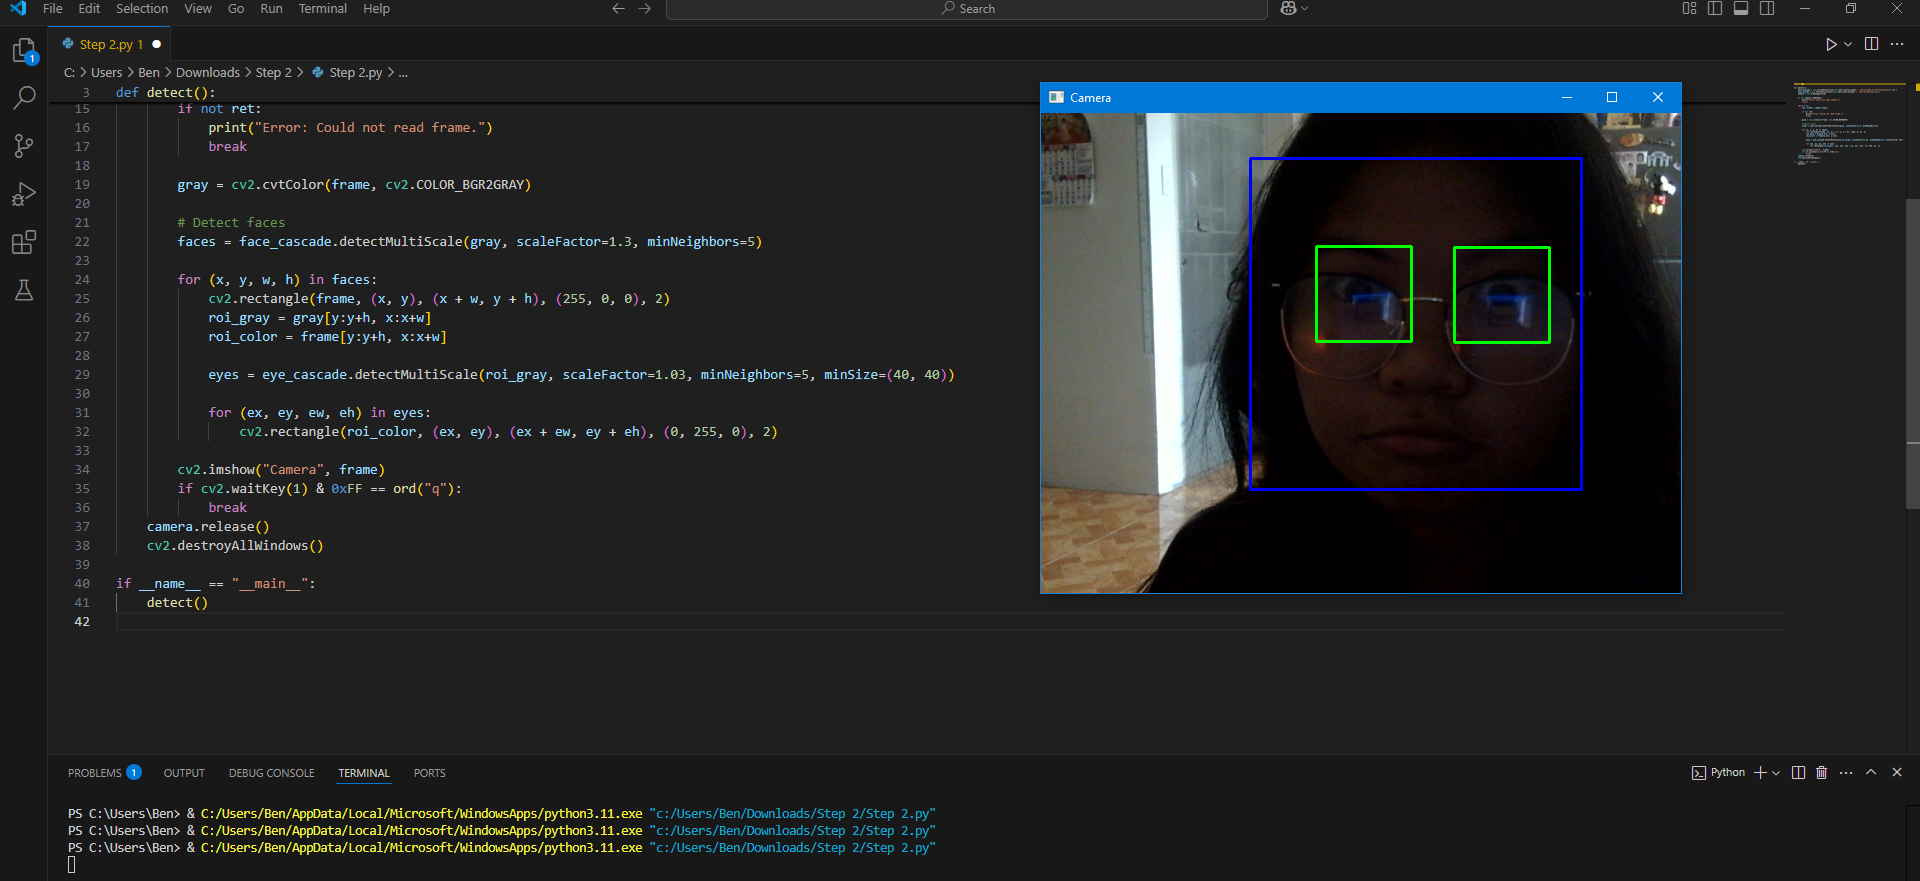



```
import cv2

def detect():
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    camera = cv2.VideoCapture(0)

    if not camera.isOpened():
        print("Error: Could not open camera.")
        return

    while True:
        ret, frame = camera.read()

        if not ret:
            print("Error: Could not read frame.")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]

            eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.03, minNeighbors=5, minSize=(40, 40))

            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

        cv2.imshow("Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect()

```



**Provide the following**:
- Screenshot of the output for the working code once you've put it all together.
- Summary of the steps you've performed along with observations.

## 4. Supplementary Activity

In your Cameo project, include real-time face detection using Haar cascade. Show screenshots of the working demonstration for this supplementary activity.

Additionally, implement similar steps to detect a smile using Haar cascades.

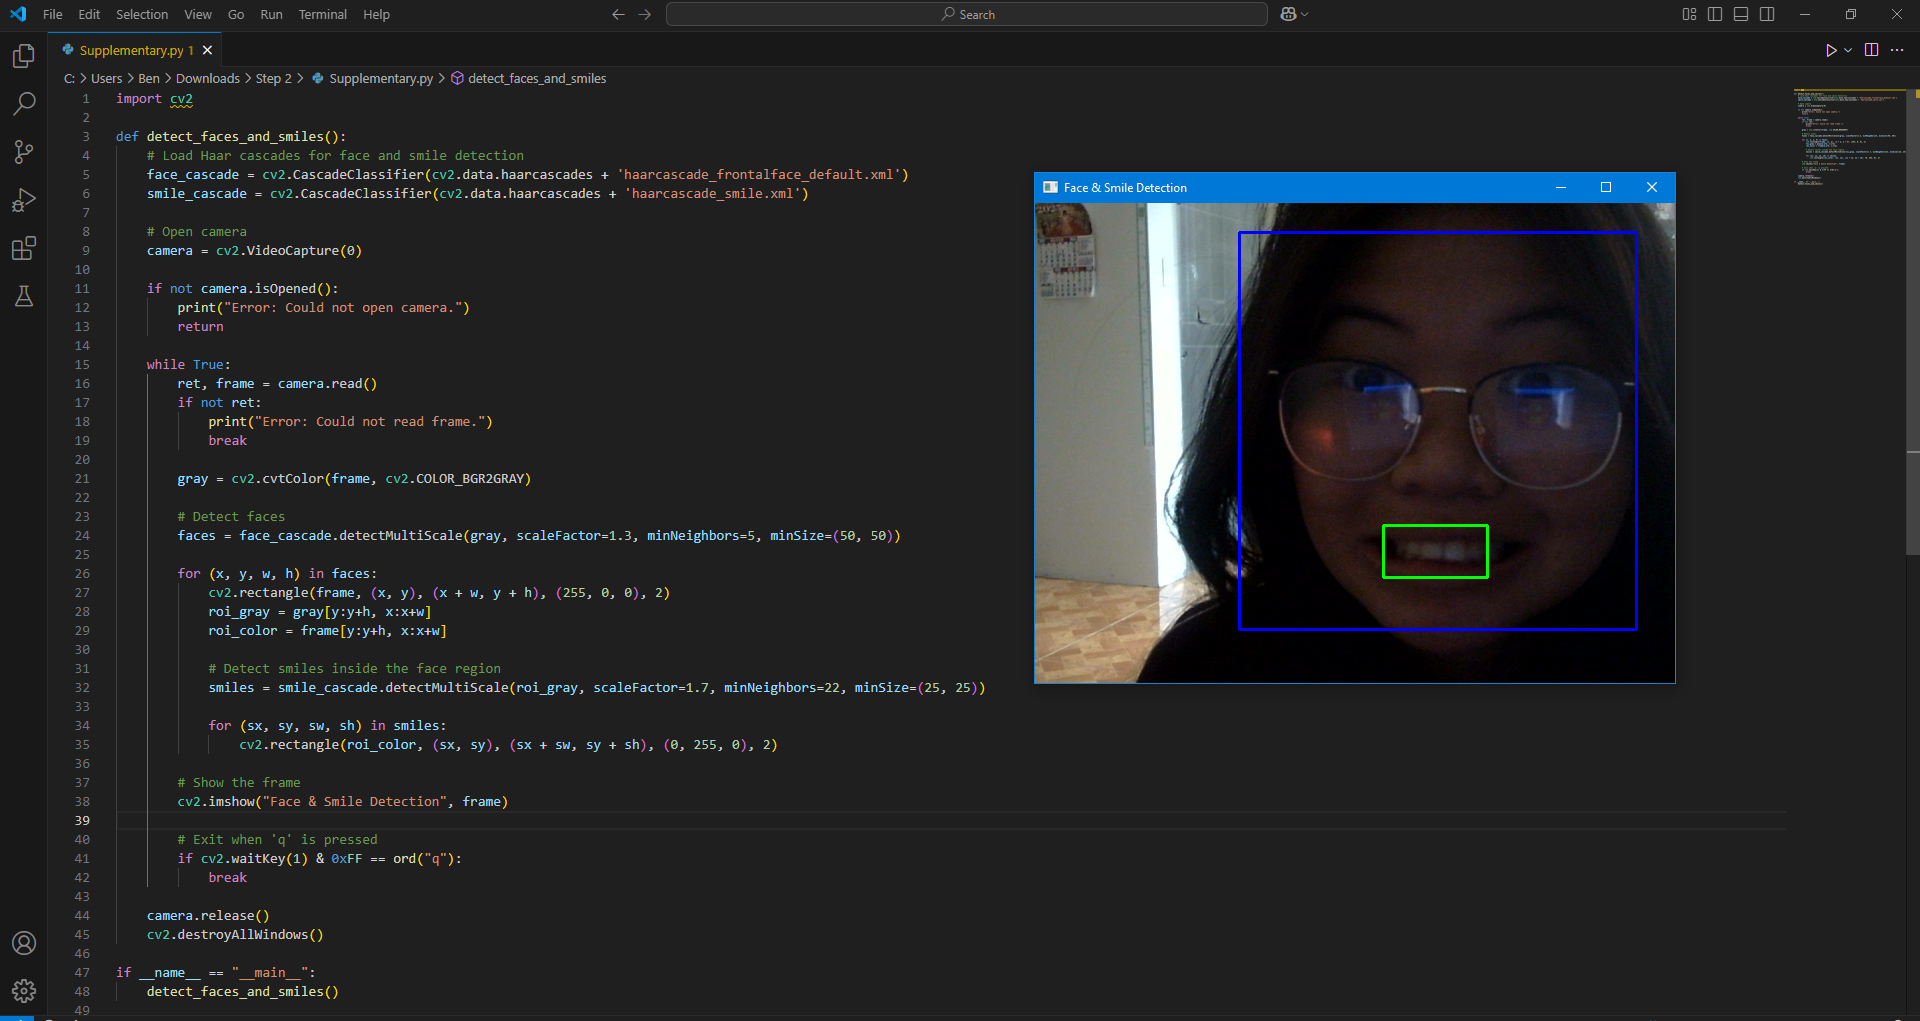

## 5. Summary, Conclusions and Lessons Learned


When stumbling upon this activity I found myself in chaos since I am not able to run the code in the colab notebook due to I assume privacy concerns though I was able to implement it through Vscode. This activity helps me to undertand how to detect faces in images and videos using Haar cascades and OpenCV. We saw that the same fundamental principles apply to both still images and video streams.The process is surprisingly straightforward, demonstrating the power of computer vision techniques. I felt like I was able to gain practical understanding of how computer vision can be used

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*